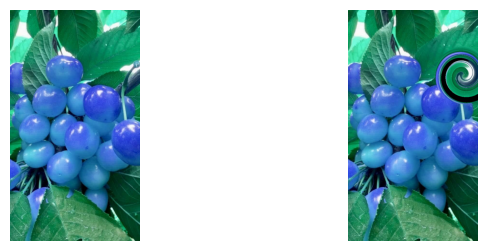

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

#transformasi Twirl
def swirled_effect(image, strength, radius):
    rows, cols = image.shape[:2]
    center_x, center_y = rows / 2, cols / 2
    map_x = np.zeros((rows, cols), dtype=np.float32)
    map_y = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            x = j - center_x
            y = i - center_y
            theta = np.arctan2(y, x)
            distance = np.sqrt(x * x + y * y)
            if distance < radius:
                r = distance / radius
                angle = strength * (1 - r)
                map_x[i, j] = int(x * np.cos(angle) + y * np.sin(angle) + center_x)
                map_y[i, j] = int(-x * np.sin(angle) + y * np.cos(angle) + center_y)
            else:
                map_x[i, j] = j
                map_y[i, j] = i

    output = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)
    return output

img = cv2.imread('anggur.jpg')

output_img = swirled_effect(img, strength=10, radius=120)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)
ax0.imshow(img, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(output_img, cmap=plt.cm.gray)
ax1.axis('off')
plt.show()


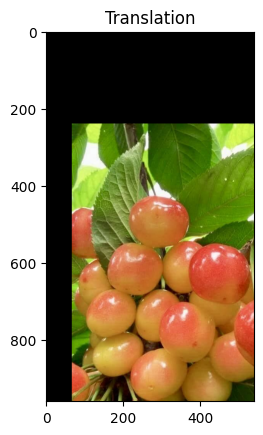

In [11]:
#Translation
image = cv2.imread("anggur.jpg")
h, w = image.shape[:2]
half_height, half_width = h // 4, w // 8
transition_matrix = np.float32([[1, 0, half_width], [0, 1, half_height]])
img_transition = cv2.warpAffine(image, transition_matrix, (w, h))
plt.imshow(cv2.cvtColor(img_transition, cv2.COLOR_BGR2RGB))
plt.title("Translation")
plt.show()


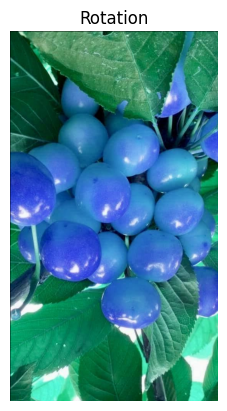

In [14]:
#Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols / 2, rows / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

img = cv2.imread('anggur.jpg')
rotated_img = rotate_image(img, angle=-180)

plt.imshow(rotated_img)
plt.axis('off')
plt.title("Rotation")
plt.show()

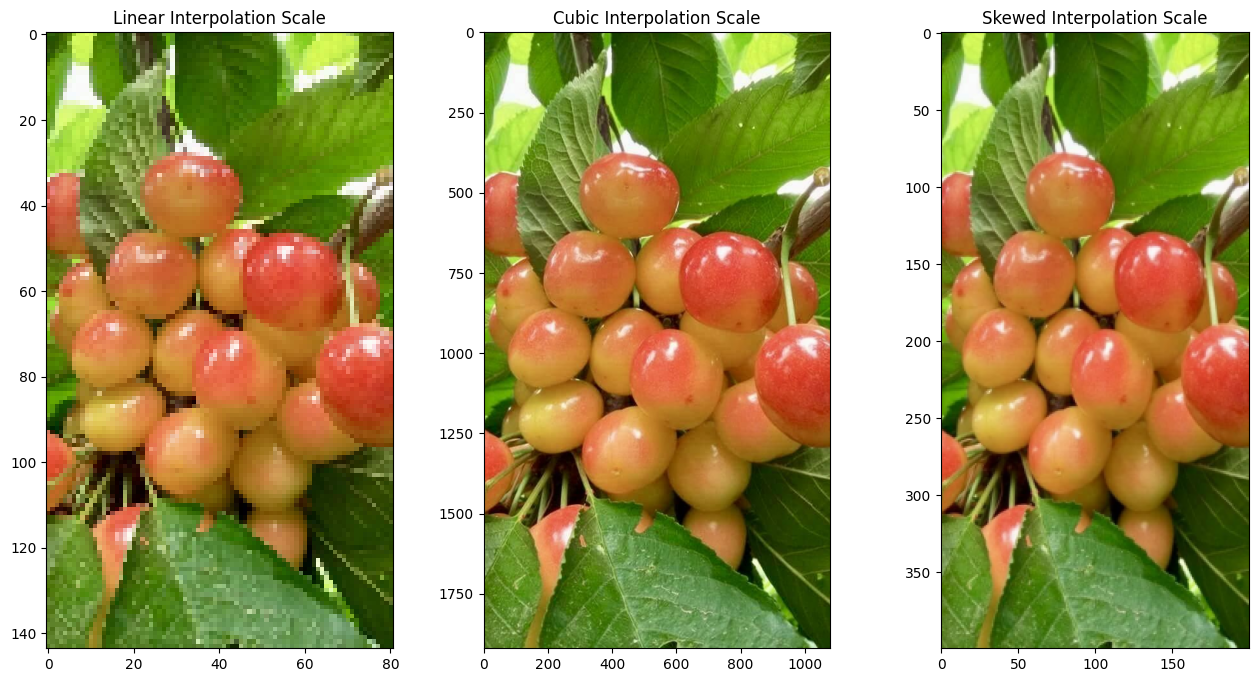

In [15]:
#Skala Interpolasi Miring
image = cv2.imread("anggur.jpg")
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
image_scaled = cv2.resize(image, None, fx=0.15, fy=0.15)
ax[0].imshow(cv2.cvtColor(image_scaled, cv2.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")
image_scaled_2 = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
ax[1].imshow(cv2.cvtColor(image_scaled_2, cv2.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")
image_scaled_3 = cv2.resize(image, (200, 400), interpolation=cv2.INTER_AREA)
ax[2].imshow(cv2.cvtColor(image_scaled_3, cv2.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale")
plt.show()